In [1]:
import pandas as pd

/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_73044/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('new_result/all_concat.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,date,review,rating,title,platform,thumbs_up_count,review_version,app_version,app
0,2023-02-16 16:47:48,"Fantastic app, it changed my way to workout in...",5,"Amazing app, some improvements needed",AppStore,NaN,NaN,NaN,duoswim
1,2023-12-01 18:08:43,Brilliant app which not only looks great but w...,5,Highly recommend,AppStore,NaN,NaN,NaN,duoswim
2,2023-01-14 18:32:17,Positive: The coaching side seems ok and decen...,2,"Watch app is very limited, integration apple f...",AppStore,NaN,NaN,NaN,duoswim
3,2022-06-12 10:13:29,Finally a swim app that looks great and provid...,5,A brilliant app,AppStore,NaN,NaN,NaN,duoswim
4,2022-06-11 19:02:41,This app is very easy to use. I love how you c...,5,Great for all swimmers!,AppStore,NaN,NaN,NaN,duoswim


In [4]:
# 檢查'review'欄位是否有文字
df['has_review_text'] = df['review'].notna()

# 計算每個應用程序有文字評論和沒有文字評論的評論數量
review_counts = df.groupby(['app', 'has_review_text']).size().unstack(fill_value=0).reset_index()

# 重命名欄位以便於理解
review_counts.columns = ['app', 'no_text', 'with_text']

print(review_counts)

         app  no_text  with_text
0    duoswim        0         18
1  form-swim        0        219
2  myswimpro        1        959
3   swim-com        0        648
4     swimup        0         70


In [6]:
# Convert 'date' column to datetime
# df['date'] = pd.to_datetime(df['date'])


# Find the earliest and latest review dates
earliest_review_date = df['date'].min()
latest_review_date = df['date'].max()

earliest_review_date, latest_review_date


('2015-02-03 10:51:46', '2023-12-18 01:55:37')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
def plot_distribution(app_name: str):
    df = pd.read_csv('new_result/all_concat_sentiment.csv')
    df.drop('Unnamed: 0', axis=1, inplace=True)
    merged_data = df[df['app'] == f'{app_name}']

    # Define the custom color (R: 146, G: 200, B: 185)
    custom_color = "#2E9D7C"

    # Set up the style for plots with the custom color
    sns.set_style("whitegrid")

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Plot rating distribution
    sns.histplot(data=merged_data, x='rating', bins=5, ax=axes[0], kde=True, color=custom_color)
    axes[0].set_title('Rating Distribution')
    axes[0].set_xlabel('Rating')
    axes[0].set_ylabel('Count')

    # Plot polarity distribution
    sns.histplot(data=merged_data, x='sentiment', bins=10, ax=axes[1], kde=True, color=custom_color)
    axes[1].set_title('Polarity Distribution')
    axes[1].set_xlabel('Polarity')
    axes[1].set_ylabel('Count')

    # Plot subjectivity distribution
    sns.histplot(data=merged_data, x='subjectivity', bins=10, ax=axes[2], kde=True, color=custom_color)
    axes[2].set_title('Subjectivity Distribution')
    axes[2].set_xlabel('Subjectivity')
    axes[2].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()

    # Save the entire layout as a single image
    fig.savefig(f'{app_name}.png')
    
    plt.show()

# For demonstration, let's call the function with a sample app name
# plot_distribution('sample_app')  # Uncomment this line to execute the function for a sample app


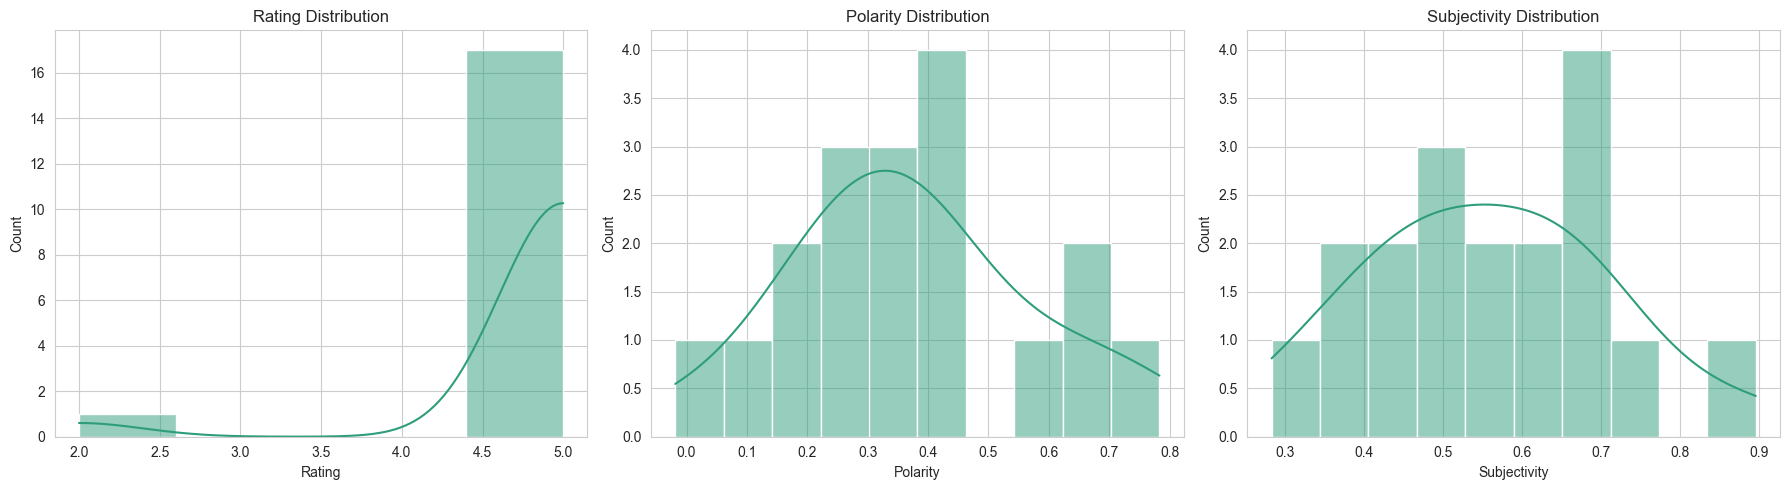

In [26]:
plot_distribution('duoswim')

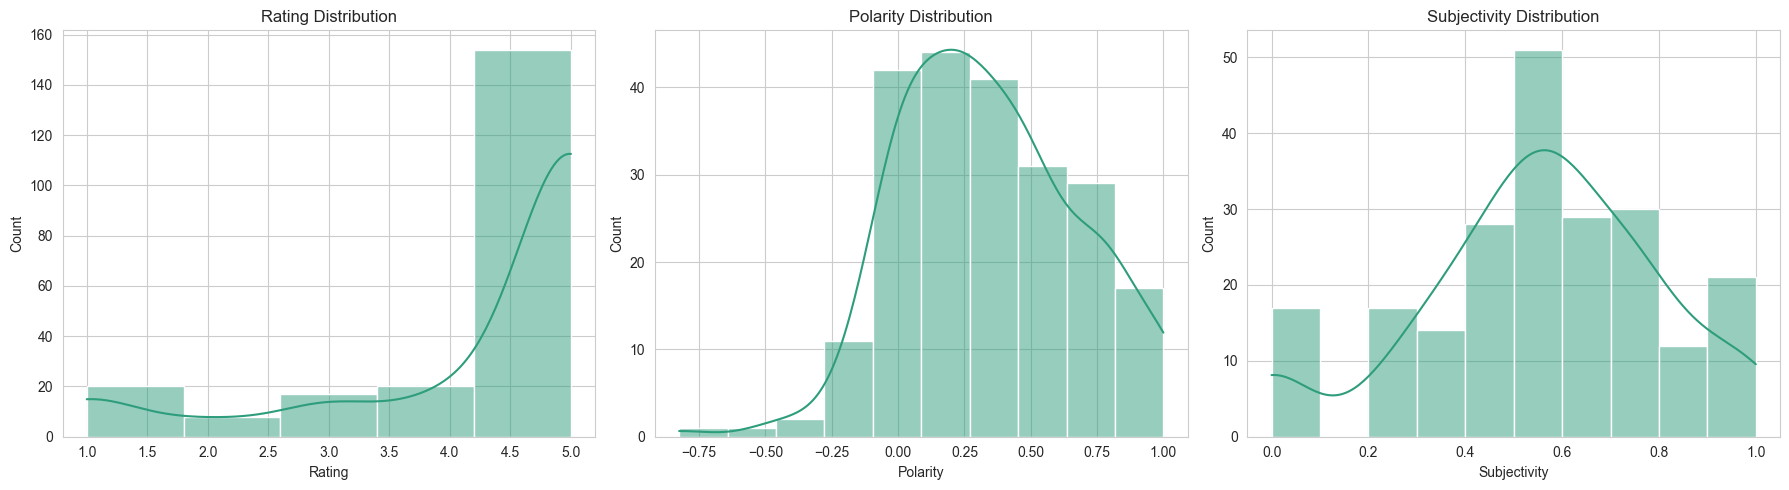

In [27]:
plot_distribution('form-swim')

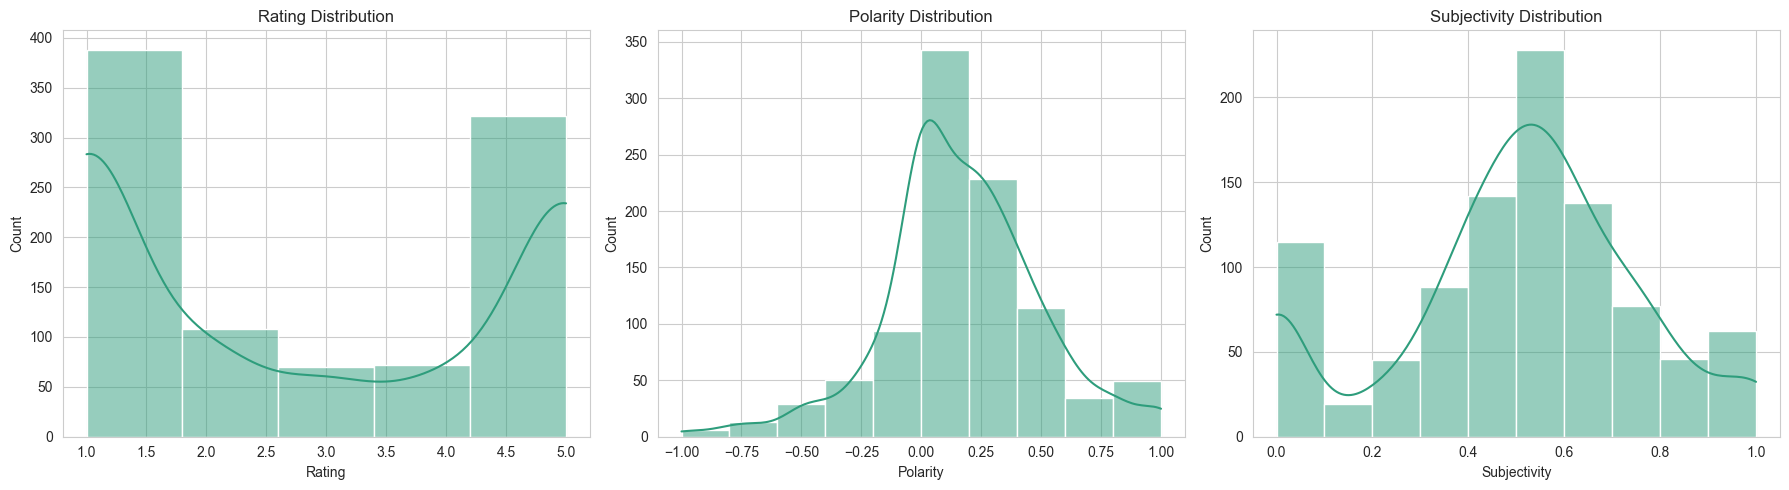

In [29]:
plot_distribution('myswimpro')

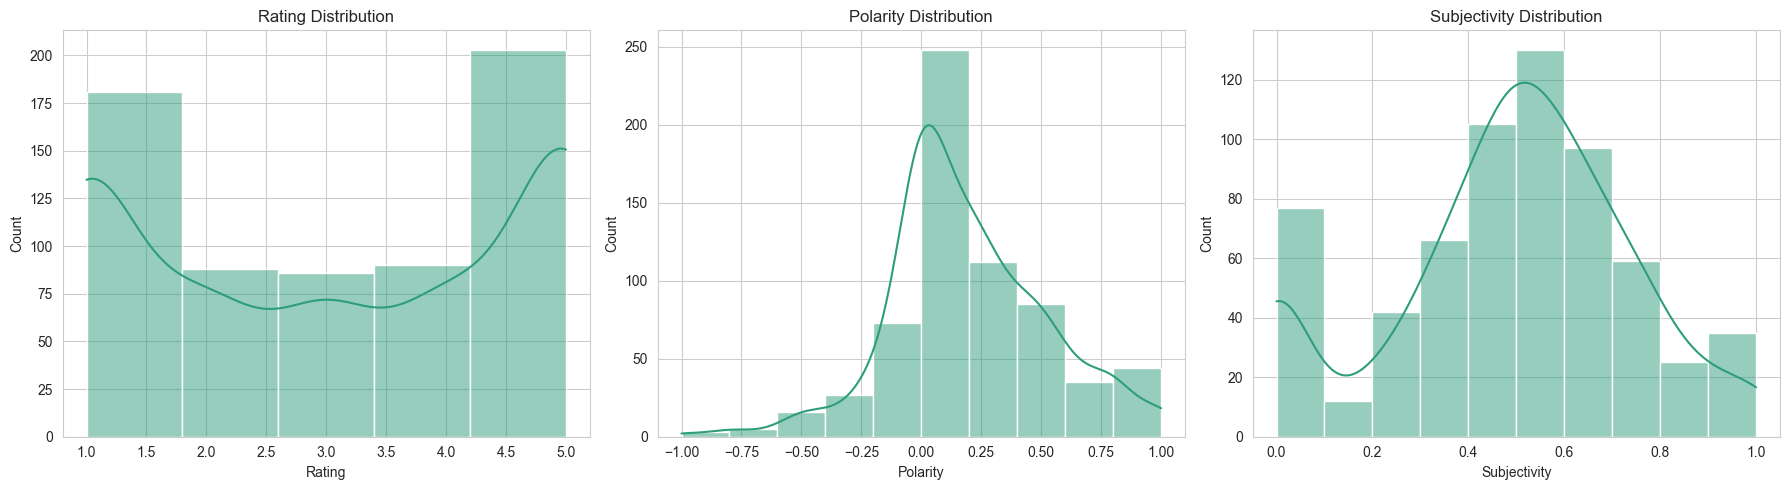

In [30]:
plot_distribution('swim-com')

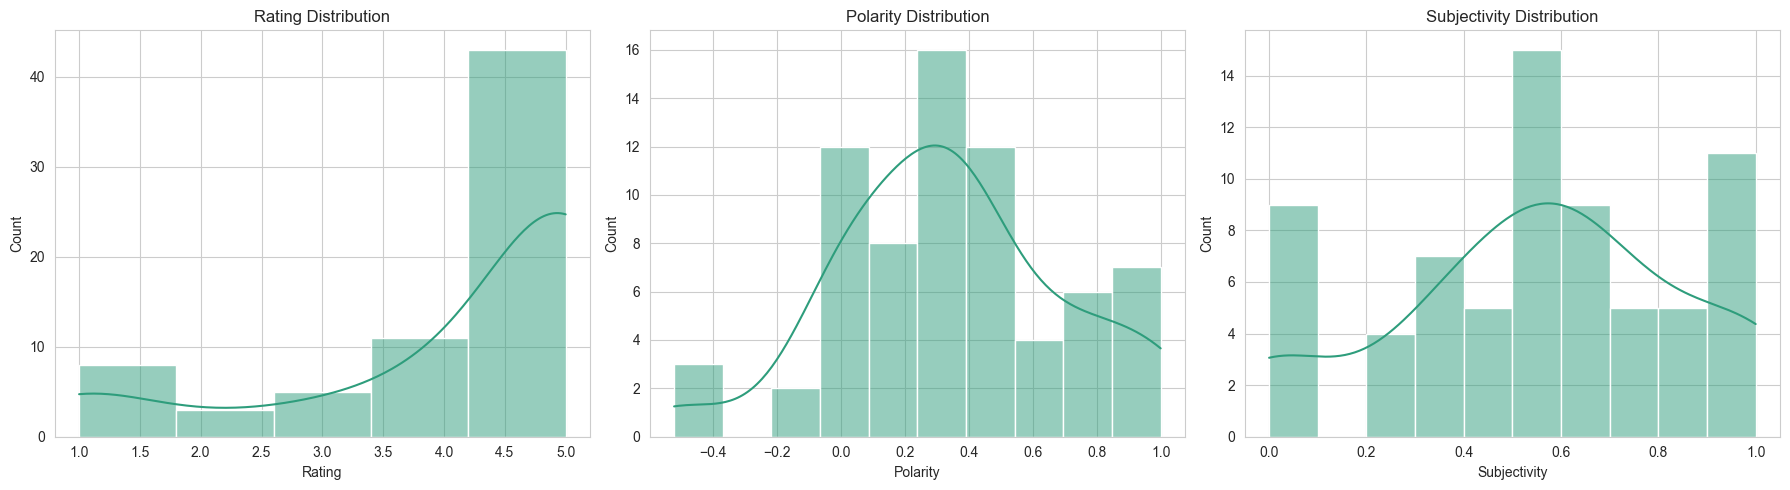

In [31]:
plot_distribution('swimup')

In [1]:
import pandas as pd

# 讀取資料
df = pd.read_csv('new_result/all_concat_sentiment.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# 計算評分平均值和標準差
def calculate_stats(app_name: str):
    merged_data = df[df['app'] == app_name]
    mean_rating = merged_data['rating'].mean()
    std_rating = merged_data['rating'].std()
    return mean_rating, std_rating

# 使用範例應用程式名稱計算評分平均值和標準差
app_names = ['duoswim', 'form-swim', 'myswimpro', 'swim-com', 'swimup']
for app_name in app_names:
    mean_rating, std_rating = calculate_stats(app_name)
    print(f'App: {app_name}, Mean Rating: {mean_rating}, Standard Deviation: {std_rating}')

App: duoswim, Mean Rating: 4.833333333333333, Standard Deviation: 0.7071067811865476
App: form-swim, Mean Rating: 4.2785388127853885, Standard Deviation: 1.2957395472872195
App: myswimpro, Mean Rating: 2.825, Standard Deviation: 1.7659152657350226
App: swim-com, Mean Rating: 3.0709876543209877, Standard Deviation: 1.62606976695925
App: swimup, Mean Rating: 4.114285714285714, Standard Deviation: 1.3783297721019183


/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_28006/936587309.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
